In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [3]:
job_params = {    
    'planes' :         n.arange(0,15),
    'n_ch_tif' : 15,
    'n_init_files' :   6,
    'fuse_shift_override' : 6,
    'subtract_crosstalk' : False,
    'init_n_frames' : None,
    'reg_filter_pcorr' : 2,
    
    'fix_fastZ' : 0,
}

In [4]:
subjects_dir =   '/mnt/zortex-subjects/'
expt_info = { 
    'subject':         'AH010',
    'date' :          '2024-02-12',
    'expnum' :         [1,2,4,5],}

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=True, get_si_params=True)
job_params['fs'] = si_params['vol_rate']

savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

Looking for AH010/2024-02-12/1 in /mnt/zortex-subjects/
Found
Looking for AH010/2024-02-12/2 in /mnt/zortex-subjects/
Found
Looking for AH010/2024-02-12/4 in /mnt/zortex-subjects/
Found
Looking for AH010/2024-02-12/5 in /mnt/zortex-subjects/
Found


In [5]:
# Create the job
job = Job('/mnt/md0/runs',exp_str, tifs = tifs,
          params=job_params, create=False, overwrite=True, verbosity = 3)
# job.update_root_path('/mnt/md0/runs')

   Found and loaded params from /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/params.npy


In [6]:
%%time
# summary = job.run_init_pass()

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


In [7]:
# job.show_summary_plots()

In [8]:
# summary = job.load_summary()

In [9]:
# job.verbosity=2

In [10]:
# job.register_gpu()

In [11]:
# mov = job.get_registered_movie()

In [13]:
job.params['t_batch_size'] = 400
job.params['voxel_size_um'] = (15, 2.5, 2.5)
job.params['npil_filt_type'] = 'unif'
job.params['npil_filt_xy_um'] = 70
job.params['npil_filt_z_um'] = 15.0
job.params['cell_filt_type'] = 'unif'
job.params['cell_filt_xy_um'] = 10.0
job.params['cell_filt_z_um'] = 8.0
job.params['edge_crop_npix'] = 7
job.params['fix_vmap_edge_planes'] = True
job.params['sdnorm_exp'] = 0.85
job.params['intensity_thresh'] = 0.1
job.params['n_proc'] = 32

In [ ]:
corrmap_new = job.calculate_corr_map(save=True)

      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/corrmap
      Updating self.dirs tag corrmap
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/mov_sub
      Updating self.dirs tag mov_sub
   Saved a copy of params at /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/corrmap
   Updated main params file
   Computing correlation map of movie with 45521 frames, volume shape: 15, 1053, 767
      Running batch 1 of 114
         Loading movie into shared memory
         Subtracting neuropil and applying cell filters
         Reducing filtered movie to compute correlation map
      Running batch 2 of 114
         Loading movie into shared memory
         Subtracting neuropil and applying cell filters
         Reducing filtered movie to compute correlation map
      Running batch 3 of 114
         Loading movie into shared memory
         Subtracting neuropil and applying cell filters
         Reducing filtered movie to compute correlation map
      Running batch 4 of 114
         

In [16]:
results = job.load_corr_map_results()

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f3dfc483610>)

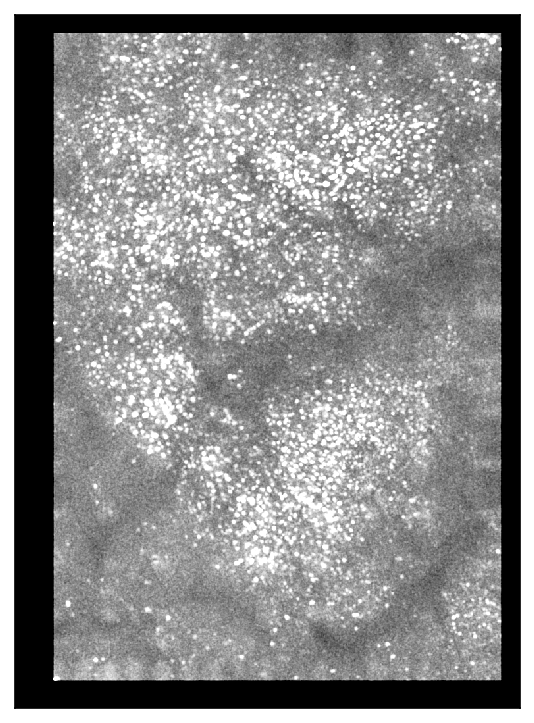

In [25]:
tfu.show_tif(results['vmap'][6], vminmax = (2,3))

In [37]:
job.verbosity = 2
job.params['detection_timebin'] = 2
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 2.2
job.params['patch_size_xy'] = (150,150)
job.params['n_proc_detect'] = 8
job.params['activity_thresh'] = 15.0
job.params['percentile'] = 99.0
job.params['extend_thresh'] = 0.2
job.params['max_iter'] = 5000 # maximum number of ROIs detected in given patch

In [ ]:
%%time
job.segment_rois()

      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation
      Updating self.dirs tag segmentation
   Saved a copy of params at /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois
      Updating self.dirs tag rois
   Saving results to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation and /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois 
dict_keys(['max_img', 'mean_img', 'vmap', 'all_params'])
   Detecting from patch 1 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0000
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0000/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0000/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0000/iscell.npy
   Detecting from patch 2 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0001
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0001/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0001/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0001/iscell.npy
   Detecting from patch 3 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0002
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0002/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0002/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0002/iscell.npy
   Detecting from patch 4 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0003
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0003/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0003/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0003/iscell.npy
   Detecting from patch 5 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0004
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0004/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0004/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0004/iscell.npy
   Detecting from patch 6 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0005
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0005/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0005/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0005/iscell.npy
   Detecting from patch 7 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0006
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0006/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0006/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0006/iscell.npy
   Detecting from patch 8 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0007
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0007/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0007/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0007/iscell.npy
   Detecting from patch 9 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0008
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0008/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0008/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0008/iscell.npy
   Detecting from patch 10 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0009
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0009/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0009/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0009/iscell.npy
   Detecting from patch 11 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0010
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0010/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0010/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0010/iscell.npy
   Detecting from patch 12 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0011
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0011/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0011/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0011/iscell.npy
   Detecting from patch 13 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0012
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0012/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0012/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0012/iscell.npy
   Detecting from patch 14 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0013
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0013/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0013/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0013/iscell.npy
   Detecting from patch 15 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0014
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0014/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0014/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0014/iscell.npy
   Detecting from patch 16 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0015
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0015/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0015/iscell.npy
   Detecting from patch 17 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0016
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0016/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0016/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0016/iscell.npy
   Detecting from patch 18 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0017
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0017/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0017/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0017/iscell.npy
   Detecting from patch 19 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0018
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0018/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0018/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0018/iscell.npy
   Detecting from patch 20 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0019
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0019/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0019/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0019/iscell.npy
   Detecting from patch 21 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0020
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0020/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0020/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0020/iscell.npy
   Detecting from patch 22 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0021
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0021/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0021/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0021/iscell.npy
   Detecting from patch 23 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0022
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0022/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0022/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0022/iscell.npy
   Detecting from patch 24 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0023
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0023/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0023/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0023/iscell.npy
   Detecting from patch 25 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0024
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0024/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0024/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0024/iscell.npy
   Detecting from patch 26 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0025
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0025/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0025/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0025/iscell.npy
   Detecting from patch 27 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0026
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0026/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0026/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0026/iscell.npy
   Detecting from patch 28 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0027
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0027/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0027/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0027/iscell.npy
   Detecting from patch 29 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0028
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0028/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0028/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0028/iscell.npy
   Detecting from patch 30 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0029
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0029/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0029/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0029/iscell.npy
   Detecting from patch 31 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0030
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0030/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0030/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0030/iscell.npy
   Detecting from patch 32 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0031
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0031/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0031/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0031/iscell.npy
   Detecting from patch 33 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0032
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0032/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0032/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0032/iscell.npy
   Detecting from patch 34 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0033
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0033/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0033/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0033/iscell.npy
   Detecting from patch 35 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0034
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0034/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0034/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0034/iscell.npy
   Detecting from patch 36 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0035
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0035/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0035/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0035/iscell.npy
   Detecting from patch 37 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0036
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0036/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0036/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0036/iscell.npy
   Detecting from patch 38 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0037
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0037/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0037/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0037/iscell.npy
   Detecting from patch 39 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0038
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0038/stats.npy
   Found 5000 cells in 624 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0038/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0038/iscell.npy
   Detecting from patch 40 / 54
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0039
      Binning movie with a factor of 2.00


/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/core/magics/execution.py:1317: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = eval(code, glob, local_ns)


      Starting extraction with peak_thresh: 2.200 and Th2: 15.000


In [48]:
job.combine_patches(n.arange(54), job.dirs['rois'],parent_dir_name='segmentation', info_use_idx=None, max_roi_per_patch=1500)

      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0000
      Updating self.dirs tag segmentation-segmentation-patch-0000
      Clipping patch 0 because it has 5000 ROIs, max is 1500
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0001
      Updating self.dirs tag segmentation-segmentation-patch-0001
      Clipping patch 1 because it has 5000 ROIs, max is 1500
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0002
      Updating self.dirs tag segmentation-segmentation-patch-0002
      Clipping patch 2 because it has 5000 ROIs, max is 1500
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0003
      Updating self.dirs tag segmentation-segmentation-patch-0003
      Clipping patch 3 because it has 5000 ROIs, max is 1500
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0004
      Updating self.dirs tag segmentation-segmentation-patch-0004
      Clipp

      Clipping patch 41 because it has 5000 ROIs, max is 1500
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0042
      Updating self.dirs tag segmentation-segmentation-patch-0042
      Clipping patch 42 because it has 5000 ROIs, max is 1500
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0043
      Updating self.dirs tag segmentation-segmentation-patch-0043
      Clipping patch 43 because it has 5000 ROIs, max is 1500
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0044
      Updating self.dirs tag segmentation-segmentation-patch-0044
      Clipping patch 44 because it has 5000 ROIs, max is 1500
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0045
      Updating self.dirs tag segmentation-segmentation-patch-0045
      Clipping patch 45 because it has 5000 ROIs, max is 1500
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/segmentation/patch-0046
      Updat

'/mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois'

In [52]:
%%time
# job.compute_npil_masks(job.dirs['rois'])
traces = job.extract_and_deconvolve(stats_dir = job.dirs['rois'], crop=False)

   Updated main params file
   Movie shape: (15, 45521, 1053, 767)
79189
   Extracting 79189 valid cells, and saving cell flags to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois/iscell_extracted.npy
   Extracting activity
Will extract in 92 batches of 500
Saving intermediate results to /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois
Extracting batch 0000 of 0092
Batch size: 22 GB
Extracting batch 0001 of 0092
Batch size: 22 GB
Extracting batch 0002 of 0092
Batch size: 22 GB
Extracting batch 0003 of 0092
Batch size: 22 GB
Extracting batch 0004 of 0092
Batch size: 22 GB
Extracting batch 0005 of 0092
Batch size: 22 GB
Extracting batch 0006 of 0092
Batch size: 22 GB
Extracting batch 0007 of 0092
Batch size: 22 GB
Extracting batch 0008 of 0092
Batch size: 22 GB
Extracting batch 0009 of 0092
Batch size: 22 GB
Extracting batch 0010 of 0092
Batch size: 22 GB
Extracting batch 0011 of 0092
Batch size: 22 GB
Extracting batch 0012 of 0092
Batch size: 22 GB
Extracting batch 0013 of 0092
Batch size

In [53]:
job.export_results(export_path='/mnt/zeytin-f1/s3d-results/', result_dir_name='rois')

   Created dir /mnt/zeytin-f1/s3d-results/s3d-results-AH010_2024-02-12_1-2-4-5 to export results
      Loading from /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois/stats_small.npy
      Loading from /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois/info.npy
      Loading from /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois/F.npy
      Loading from /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois/spks.npy
      Loading from /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois/Fneu.npy
      Loading from /mnt/md0/runs/s3d-AH010_2024-02-12_1-2-4-5/rois/iscell.npy
      Overwriting existing /mnt/zeytin-f1/s3d-results/s3d-results-AH010_2024-02-12_1-2-4-5/s3d-params.npy
      Overwriting existing /mnt/zeytin-f1/s3d-results/s3d-results-AH010_2024-02-12_1-2-4-5/frames.npy
      Overwriting existing /mnt/zeytin-f1/s3d-results/s3d-results-AH010_2024-02-12_1-2-4-5/stats.npy
      Saved stats.npy to /mnt/zeytin-f1/s3d-results/s3d-results-AH010_2024-02-12_1-2-4-5
      Overwriting existing /mnt/zeytin-f1/s

In [162]:
params_to_sweep = {
    'activity_thresh' : (10.0, 15.0),
    'percentile' : (98.0, 99.0, 99.9),
    'extend_thresh' : (0.1,0.2,0.3)
}

In [163]:
sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',
                               all_combinations = True, patches_to_segment = (15,), ts = (0,1200))

   Setting up sweep
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test
      Updating self.dirs tag sweeps-seg-on-test
   Total of 18 combinations
      Created directory for comb_00000 with params comb00000-params-activity_thresh_10.000-percentile_98.000-extend_thresh_0.100
   Created dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00000 with tag sweeps-seg-on-test-comb_00000
      Updating self.dirs tag sweeps-seg-on-test-comb_00000
      Created directory for comb_00001 with params comb00001-params-activity_thresh_10.000-percentile_98.000-extend_thresh_0.200
   Created dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00001 with tag sweeps-seg-on-test-comb_00001
      Updating self.dirs tag sweeps-seg-on-test-comb_00001
      Created directory for comb_00002 with params comb00002-params-activity_thresh_10.000-percentile_98.000-extend_thresh_0.300
   Created dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/se

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 10.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00000/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00000/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00000/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00000/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00000-segmentation-sweeps-seg-on-test-comb_00000-segmentation-patch-0015
      Deduplicating cells
      Removed 5 duplicate cells
   Combined 1 patches, 995 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00000/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/run

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 10.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00001/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00001/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00001/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00001/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00001-segmentation-sweeps-seg-on-test-comb_00001-segmentation-patch-0015
      Deduplicating cells
      Removed 3 duplicate cells
   Combined 1 patches, 997 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00001/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/run

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 10.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00002/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00002/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00002/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00002/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00002-segmentation-sweeps-seg-on-test-comb_00002-segmentation-patch-0015
      Deduplicating cells
      Removed 4 duplicate cells
   Combined 1 patches, 996 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00002/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/run

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 10.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00003/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00003/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00003/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00003/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00003-segmentation-sweeps-seg-on-test-comb_00003-segmentation-patch-0015
      Deduplicating cells
      Removed 8 duplicate cells
   Combined 1 patches, 992 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00003/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/run

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 10.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00004/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00004/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00004/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00004/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00004-segmentation-sweeps-seg-on-test-comb_00004-segmentation-patch-0015
      Deduplicating cells
      Removed 9 duplicate cells
   Combined 1 patches, 991 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00004/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/run

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 10.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00005/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00005/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00005/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00005/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00005-segmentation-sweeps-seg-on-test-comb_00005-segmentation-patch-0015
      Deduplicating cells
      Removed 15 duplicate cells
   Combined 1 patches, 985 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00005/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 10.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00006/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00006/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00006/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00006/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00006-segmentation-sweeps-seg-on-test-comb_00006-segmentation-patch-0015
      Deduplicating cells
      Removed 11 duplicate cells
   Combined 1 patches, 989 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00006/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 10.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00007/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00007/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00007/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00007/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00007-segmentation-sweeps-seg-on-test-comb_00007-segmentation-patch-0015
      Deduplicating cells
      Removed 25 duplicate cells
   Combined 1 patches, 975 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00007/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 10.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00008/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00008/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00008/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00008/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00008-segmentation-sweeps-seg-on-test-comb_00008-segmentation-patch-0015
      Deduplicating cells
      Removed 18 duplicate cells
   Combined 1 patches, 982 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00008/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00009/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00009/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00009/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00009/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00009-segmentation-sweeps-seg-on-test-comb_00009-segmentation-patch-0015
      Deduplicating cells
      Removed 6 duplicate cells
   Combined 1 patches, 994 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00009/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/run

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00010/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00010/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00010/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00010/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00010-segmentation-sweeps-seg-on-test-comb_00010-segmentation-patch-0015
      Deduplicating cells
      Removed 7 duplicate cells
   Combined 1 patches, 993 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00010/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/run

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00011/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00011/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00011/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00011/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00011-segmentation-sweeps-seg-on-test-comb_00011-segmentation-patch-0015
      Deduplicating cells
      Removed 15 duplicate cells
   Combined 1 patches, 985 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00011/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00012/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00012/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00012/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00012/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00012-segmentation-sweeps-seg-on-test-comb_00012-segmentation-patch-0015
      Deduplicating cells
      Removed 8 duplicate cells
   Combined 1 patches, 992 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00012/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/run

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00013/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00013/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00013/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00013/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00013-segmentation-sweeps-seg-on-test-comb_00013-segmentation-patch-0015
      Deduplicating cells
      Removed 15 duplicate cells
   Combined 1 patches, 985 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00013/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00014/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00014/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00014/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00014/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00014-segmentation-sweeps-seg-on-test-comb_00014-segmentation-patch-0015
      Deduplicating cells
      Removed 19 duplicate cells
   Combined 1 patches, 981 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00014/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00015/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00015/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00015/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00015/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00015-segmentation-sweeps-seg-on-test-comb_00015-segmentation-patch-0015
      Deduplicating cells
      Removed 13 duplicate cells
   Combined 1 patches, 987 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00015/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00016/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00016/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00016/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00016/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00016-segmentation-sweeps-seg-on-test-comb_00016-segmentation-patch-0015
      Deduplicating cells
      Removed 25 duplicate cells
   Combined 1 patches, 975 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00016/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru

/tmp/ipykernel_1717423/2500248111.py:1: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  sweep = job.sweep_segmentation(params_to_sweep,input_dir_name = 'test-corrmap', sweep_name='seg-on-test',


      Starting extraction with peak_thresh: 0.310 and Th2: 15.000
      Saving checkpoint to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00017/segmentation/patch-0015/stats.npy
   Found 1000 cells in 124 iterations
   Saving cells to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00017/segmentation/patch-0015/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00017/segmentation/patch-0015/iscell.npy
      Found dir /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00017/segmentation/patch-0015
      Updating self.dirs tag sweeps-seg-on-test-comb_00017-segmentation-sweeps-seg-on-test-comb_00017-segmentation-patch-0015
      Deduplicating cells
      Removed 41 duplicate cells
   Combined 1 patches, 959 cells
   Saving combined files to /mnt/md0/runs/s3d-AH010_2024-02-15_1-2-3-6/sweeps/seg-on-test/comb_00017/rois
      Saved stats
      Saved iscell
      Loading from /mnt/md0/ru